###Visualização de dados iris e classificação KNN



####Bibliotecas utilizadas



In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import plotly.offline as py
import plotly.graph_objs as go

####Análise do DataFrame

In [2]:
# Ler DF

df = pd.read_csv('iris_modificado.csv', sep=';')

In [3]:
# Verificar DF

df.head()

,"5,1","3,5","1,4","0,2",Iris-setosa
0,"4,9",3,"1,4","0,2",Iris-setosa
1,"4,7","3,2","1,3","0,2",Iris-setosa
2,"4,6","3,1","1,5","0,2",Iris-setosa
3,5,"3,6","1,4","0,2",Iris-setosa
4,"5,4","3,9","1,7","0,4",Iris-setosa


In [4]:
# Definir colunas no DF

df.columns = ['Comprimento_Sepal', 'Largura_Sepal', 'Comprimento_Petal', 'Largura_Petal', 'Classe']

In [5]:
# Verifica a dimensão do DF 

df.shape

(154, 5)

In [6]:
# Verifica o tipo de dado em cada coluna

df.dtypes

Comprimento_Sepal    object
Largura_Sepal        object
Comprimento_Petal    object
Largura_Petal        object
Classe               object
dtype: object

In [7]:
# Verifica as Classes do DF

df['Classe'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Transformação dos dados

In [8]:
# Transforma as Classes em valores numéricos

label_encoder = preprocessing.LabelEncoder()
  
df['Classe'] = label_encoder.fit_transform(df['Classe'])

df['Classe'].unique()

array([0, 1, 2])

In [9]:
# Transforma os dados para o tipo Float

columns = ['Comprimento_Sepal', 'Largura_Sepal',
           'Comprimento_Petal', 'Largura_Petal']

df[columns] = df[columns].apply(lambda x: x.str.replace(',', '.').astype('float'))

In [10]:
# Verifica se existem dados vazios no DF

verifica_valores_vazios = df.isnull().values.any()

verifica_valores_vazios

True

In [11]:
# Excluir as linhas com dados 'nan'

df_sem_valores_nan = df.dropna()

In [12]:
# Dados Estatísticos

df.describe()

,Comprimento_Sepal,Largura_Sepal,Comprimento_Petal,Largura_Petal,Classe
count,153.000000,154.000000,153.000000,153.000000,154.000000
mean,5.833333,3.055844,3.747059,1.204575,1.012987
std,1.071030,0.438653,1.781597,0.759271,0.816393
min,1.200000,2.000000,0.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,12.000000,4.400000,6.900000,2.500000,2.000000


#### Análise exploratória

In [13]:
# Separando o DF para analizar cada uma das classes

df_mask = df_sem_valores_nan['Classe'] == 0
df_Iris_setosa = df_sem_valores_nan[df_mask]

df_mask = df_sem_valores_nan['Classe'] == 1
df_Iris_versicolor = df_sem_valores_nan[df_mask]

df_mask = df_sem_valores_nan['Classe'] == 2
df_Iris_virginica = df_sem_valores_nan[df_mask]

In [14]:
# Análise exploratoria via gráfico e dados estatísticos

# Comprimento Sepal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Comprimento_Sepal'")
fig.show()

# Largura Sepal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Largura_Sepal'")
fig.show()

# Comprimento Petal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Comprimento_Petal'")
fig.show()

# Largura Petal

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Box Plot 'Largura_Petal'")
fig.show()

####Função para excluir outliers

In [15]:
# FUNÇÂO PARA EXCLUIR OUTLIERS USANDO A TÉCNICA DE QUARTIL 

def filtro_quartil_amplitude(df):
    
    print("Mínimo ANTES do filtro: ", min(df['coluna_avaliada']))
    print("Máximo ANTES do filtro: ", max(df['coluna_avaliada']))
    print("Total de dados ANTES do filtro: ", (df['coluna_avaliada']).count())
    
    print("")
    
    Q1 = df['coluna_avaliada'].quantile(0.25)
    Q2 = df['coluna_avaliada'].quantile(0.5)
    Q3 = df['coluna_avaliada'].quantile(0.75)
    
    Amp_interquartil = Q3 - Q1
    
    limite_inferior = (Q1 - (1.2 * Amp_interquartil))
    
    limite_superior = (Q3 + (1.2 * Amp_interquartil))
    
    df_mask = df['coluna_avaliada'] > limite_inferior
    amplitudePos = df[df_mask]
    
    df_mask = amplitudePos['coluna_avaliada'] < limite_superior
    df_final = amplitudePos[df_mask]
    
    print("Mínimo DEPOIS do filtro: ", min(df_final['coluna_avaliada']))
    print("Máximo DEPOIS do filtro: ", max(df_final['coluna_avaliada']))
    print("Total de dados DEPOIS do filtro: ", (df_final['coluna_avaliada']).count())
    
    return df_final

###Excluindo outliers

### IRIS SETOSA

####Comprimento_Sepal 

In [16]:
df_Iris_setosa_pre_filtro = df_Iris_setosa

df_Iris_setosa_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Comprimento_Sepal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Comprimento_Sepal'")
fig.show()

Mínimo ANTES do filtro:  1.2
Máximo ANTES do filtro:  5.8
Total de dados ANTES do filtro:  50

Mínimo DEPOIS do filtro:  4.4
Máximo DEPOIS do filtro:  5.5
Total de dados DEPOIS do filtro:  45


#### Comprimento_Petal

In [17]:
df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                     'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Comprimento_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Comprimento_Petal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Comprimento_Petal'")
fig.show()

Mínimo ANTES do filtro:  1.0
Máximo ANTES do filtro:  1.9
Total de dados ANTES do filtro:  45

Mínimo DEPOIS do filtro:  1.2
Máximo DEPOIS do filtro:  1.7
Total de dados DEPOIS do filtro:  42


#### Largura_Sepal

In [18]:
df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Sepal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Largura_Sepal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Largura_Sepal'")
fig.show()


Mínimo ANTES do filtro:  2.3
Máximo ANTES do filtro:  4.2
Total de dados ANTES do filtro:  42

Mínimo DEPOIS do filtro:  2.9
Máximo DEPOIS do filtro:  3.9
Total de dados DEPOIS do filtro:  39


####Largura_Petal

In [19]:
df_Iris_setosa_pre_filtro = df_Iris_setosa_filtrado

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_setosa_filtrado = filtro_quartil_amplitude(df_Iris_setosa_pre_filtro)

df_Iris_setosa_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                     'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_setosa_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                   'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_setosa['Largura_Petal'], name="Setosa",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_setosa_filtrado['Largura_Petal'], name="Setosa sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Setosa - 'Largura_Petal'")
fig.show()

Mínimo ANTES do filtro:  0.1
Máximo ANTES do filtro:  0.6
Total de dados ANTES do filtro:  39

Mínimo DEPOIS do filtro:  0.1
Máximo DEPOIS do filtro:  0.4
Total de dados DEPOIS do filtro:  37


###IRIS VERSICOLOR

####Comprimento_Sepal

In [20]:
df_Iris_versicolor_pre_filtro = df_Iris_versicolor

df_Iris_versicolor_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Comprimento_Sepal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Comprimento_Sepal'")
fig.show()

Mínimo ANTES do filtro:  4.9
Máximo ANTES do filtro:  12.0
Total de dados ANTES do filtro:  52

Mínimo DEPOIS do filtro:  4.9
Máximo DEPOIS do filtro:  7.0
Total de dados DEPOIS do filtro:  51


####Comprimento_Petal

In [21]:
df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                         'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Comprimento_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Comprimento_Petal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Comprimento_Petal'")
fig.show()                                      

Mínimo ANTES do filtro:  0.0
Máximo ANTES do filtro:  5.1
Total de dados ANTES do filtro:  51

Mínimo DEPOIS do filtro:  3.3
Máximo DEPOIS do filtro:  5.1
Total de dados DEPOIS do filtro:  49


####Largura_Sepal

In [22]:
df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Sepal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Largura_Sepal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Largura_Sepal'")
fig.show()

Mínimo ANTES do filtro:  2.0
Máximo ANTES do filtro:  3.4
Total de dados ANTES do filtro:  49

Mínimo DEPOIS do filtro:  2.2
Máximo DEPOIS do filtro:  3.4
Total de dados DEPOIS do filtro:  48


####Largura_Petal

In [23]:
# Iris_versicolor - Largura_Petal 

df_Iris_versicolor_pre_filtro = df_Iris_versicolor_filtrado

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_versicolor_filtrado = filtro_quartil_amplitude(df_Iris_versicolor_pre_filtro)

df_Iris_versicolor_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                         'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_versicolor_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                       'Comprimento_Petal', 'Largura_Petal', 'Classe']


fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_versicolor['Largura_Petal'], name="Versicolor",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_versicolor_filtrado['Largura_Petal'], name="Versicolor sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Versicolor - 'Largura_Petal'")
fig.show()

Mínimo ANTES do filtro:  1.0
Máximo ANTES do filtro:  1.8
Total de dados ANTES do filtro:  48

Mínimo DEPOIS do filtro:  1.0
Máximo DEPOIS do filtro:  1.8
Total de dados DEPOIS do filtro:  48


###IRIS VIRGINICA

####Comprimento_Sepal

In [24]:
df_Iris_virginica_pre_filtro = df_Iris_virginica

df_Iris_virginica_pre_filtro.columns = ['coluna_avaliada', 'Largura_Sepal',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Comprimento_Sepal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Comprimento_Sepal'")
fig.show()

Mínimo ANTES do filtro:  2.2
Máximo ANTES do filtro:  7.9
Total de dados ANTES do filtro:  51

Mínimo DEPOIS do filtro:  5.6
Máximo DEPOIS do filtro:  7.7
Total de dados DEPOIS do filtro:  48


####Comprimento_Petal

In [25]:
df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'coluna_avaliada', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Comprimento_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Comprimento_Petal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Comprimento_Petal'")
fig.show()

Mínimo ANTES do filtro:  4.8
Máximo ANTES do filtro:  6.9
Total de dados ANTES do filtro:  48

Mínimo DEPOIS do filtro:  4.8
Máximo DEPOIS do filtro:  6.6
Total de dados DEPOIS do filtro:  45


####Largura_Sepal

In [26]:
df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'coluna_avaliada',
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Sepal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Largura_Sepal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Largura_Sepal'")
fig.show()

Mínimo ANTES do filtro:  2.2
Máximo ANTES do filtro:  3.6
Total de dados ANTES do filtro:  45

Mínimo DEPOIS do filtro:  2.5
Máximo DEPOIS do filtro:  3.4
Total de dados DEPOIS do filtro:  43


####Largura_Petal

In [27]:
df_Iris_virginica_pre_filtro = df_Iris_virginica_filtrado

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                        'Comprimento_Petal', 'coluna_avaliada', 'Classe']

df_Iris_virginica_filtrado = filtro_quartil_amplitude(df_Iris_virginica_pre_filtro)

df_Iris_virginica_pre_filtro.columns = ['Comprimento_Sepal', 'Largura_Sepal', 
                                        'Comprimento_Petal', 'Largura_Petal', 'Classe']

df_Iris_virginica_filtrado.columns = ['Comprimento_Sepal', 'Largura_Sepal',
                                      'Comprimento_Petal', 'Largura_Petal', 'Classe']

fig = go.Figure()
fig.add_trace(go.Box(y = df_Iris_virginica['Largura_Petal'], name="Virginica",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.add_trace(go.Box(y = df_Iris_virginica_filtrado['Largura_Petal'], name="Virginica sem Outliers",
                     jitter=0.9, pointpos=-1.8, boxpoints='all'))

fig.update_layout(title_text="Iris Virginica - 'Largura_Petal'")
fig.show()

Mínimo ANTES do filtro:  1.4
Máximo ANTES do filtro:  2.5
Total de dados ANTES do filtro:  43

Mínimo DEPOIS do filtro:  1.4
Máximo DEPOIS do filtro:  2.5
Total de dados DEPOIS do filtro:  43


###Concatenar as Classes

In [28]:
# JUNTADO AS CLASSES NOVAMENTE EM UM MESMO DATAFRAME

df_final_filtrado = pd.concat([df_Iris_setosa_filtrado,
                               df_Iris_versicolor_filtrado], ignore_index = True)

df_final_filtrado = pd.concat([df_final_filtrado, df_Iris_virginica_filtrado],
                              ignore_index = True)


In [29]:
df_final_filtrado.describe()


,Comprimento_Sepal,Largura_Sepal,Comprimento_Petal,Largura_Petal,Classe
count,128.000000,128.000000,128.000000,128.000000,128.000000
mean,5.866406,3.010937,3.873437,1.248437,1.046875
std,0.762019,0.354551,1.662864,0.741034,0.792279
min,4.400000,2.200000,1.200000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.375000,0.000000
50%,5.850000,3.000000,4.450000,1.400000,1.000000
75%,6.400000,3.200000,5.100000,1.800000,2.000000
max,7.700000,3.900000,6.600000,2.500000,2.000000


### Smote para balancear os Dados

In [30]:
#APLICANDO SMOTE PARA BALANCEAR OS DADOS CONFORME AS CLASSES 

df_final_filtrado_SEM_classe = df_final_filtrado.iloc[:,:4]
df_final_filtrado_SOMENTE_classe = df_final_filtrado.iloc[:,4:5]

####Divisão em Treino e Teste

In [31]:
# Aqui foi utilizado 30% para teste e 70% para treinamento

from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()  
scaler.fit(df_final_filtrado_SEM_classe)
df_final_filtrado_SEM_classe_NORMALIZADO = scaler.transform(df_final_filtrado_SEM_classe)

X_train, X_test, y_train, y_test = train_test_split(df_final_filtrado_SEM_classe_NORMALIZADO,
                                                    df_final_filtrado_SOMENTE_classe, 
                                                    test_size = 0.4, random_state = 10)

####Verificar quantas classes tem o dataset atual

In [32]:
quantidade_classes = y_train['Classe'].value_counts()

print(quantidade_classes)

2    27
0    25
1    24
Name: Classe, dtype: int64


####Aplicando SMOTE

In [33]:
oversample = SMOTE()

X_train_Smote, y_train_Smote = oversample.fit_resample(X_train, y_train)

#### Verificar quantas classes tem o novo dataset

In [34]:
quantidade_classes = y_train_Smote['Classe'].value_counts()

print(quantidade_classes)

1    27
2    27
0    27
Name: Classe, dtype: int64


### CRIANDO E TREINANDO O MODELO 

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X_train_Smote, y_train_Smote)

y_pred  = knn_model.predict(X_test)

#### Avaliando o modelo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        16

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52



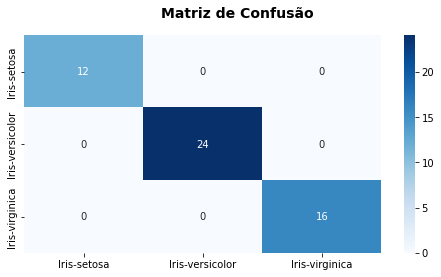

In [36]:
y_pred = pd.DataFrame(y_pred)

y_pred = y_pred.astype(int)

print(classification_report(y_pred, y_test))

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_pred, y_test)

fig = plt.figure(figsize=(8,4))
fig.suptitle('Matriz de Confusão ', fontsize=14, fontweight='bold')
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.heatmap(matriz,annot=True, fmt="d",cmap='Blues',xticklabels=labels, yticklabels= labels)